In [1]:
!pip install keras-tcn

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tcn import TCN
import os

In [17]:
data=pd.read_csv("/content/workingdataset3.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

y_binary = np.where(y == 6, 1, 0)

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    TCN(nb_filters=32, kernel_size=3, dilations=[1,2,4,8], dropout_rate=0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, batch_size=16)

Epoch 1/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.5221 - loss: 0.7224 - val_accuracy: 0.6250 - val_loss: 0.6707
Epoch 2/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.5132 - loss: 0.7656 - val_accuracy: 0.5893 - val_loss: 0.6666
Epoch 3/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.5352 - loss: 0.6901 - val_accuracy: 0.6250 - val_loss: 0.6641
Epoch 4/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5896 - loss: 0.7374 - val_accuracy: 0.6250 - val_loss: 0.6627
Epoch 5/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.5539 - loss: 0.6977 - val_accuracy: 0.6250 - val_loss: 0.6602
Epoch 6/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6419 - loss: 0.6959 - val_accuracy: 0.6250 - val_loss: 0.6591
Epoch 7/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.5694 - loss: 0.6592 - val_accuracy: 0.5893 - val_loss: 0.6601
Epoch 8/120
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.5850 - loss: 0.6944 - val_accu

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


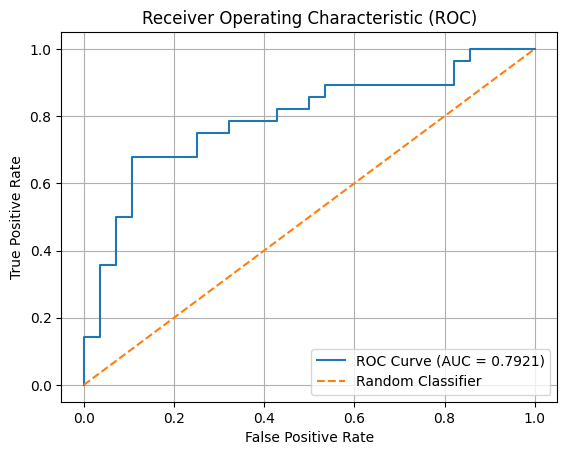

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_val).ravel()

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [19]:
disease_data=pd.read_csv("/content/workingdataset3_withouthealthy.csv")
X_dash = disease_data.iloc[:, :-1]
y_dash = disease_data.iloc[:, -1]
label_encoder = LabelEncoder()
y_dash = label_encoder.fit_transform(y_dash)
y_dash = to_categorical(y_dash)

X_train_dash, X_val_dash, y_train_dash, y_val_dash = train_test_split(X_dash, y_dash, test_size=0.2, random_state=42)
X_train_dash = X_train_dash.to_numpy()
X_val_dash = X_val_dash.to_numpy()
X_train_dash = np.expand_dims(X_train_dash, axis=-1)
X_val_dash = np.expand_dims(X_val_dash, axis=-1)

num_classes = y_dash.shape[-1]
disease_model = Sequential([
    Input(shape=(X_train_dash.shape[1], X_train_dash.shape[2])),
    TCN(nb_filters=32, kernel_size=3, dilations=[1,2,4,8], dropout_rate=0.2),
    Dense(num_classes, activation='softmax')
])
disease_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
disease_model.fit(X_train_dash, y_train_dash, validation_data=(X_val_dash, y_val_dash), epochs=120, batch_size=16)

Epoch 1/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.1731 - loss: 1.8525 - val_accuracy: 0.5357 - val_loss: 1.7437
Epoch 2/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.3134 - loss: 1.8590 - val_accuracy: 0.5714 - val_loss: 1.6694
Epoch 3/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.4687 - loss: 1.6971 - val_accuracy: 0.5714 - val_loss: 1.5759
Epoch 4/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.4009 - loss: 1.6306 - val_accuracy: 0.5714 - val_loss: 1.4867
Epoch 5/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4338 - loss: 1.5670 - val_accuracy: 0.5357 - val_loss: 1.4253
Epoch 6/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.4545 - loss: 1.4825 - val_accuracy: 0.5357 - val_loss: 1.4098
Epoch 7/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.4504 - loss: 1.4508 - val_accuracy: 0.5357 - val_loss: 1.3836
Epoch 8/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.4612 - loss: 1.4496 - val_accuracy: 0.5357 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


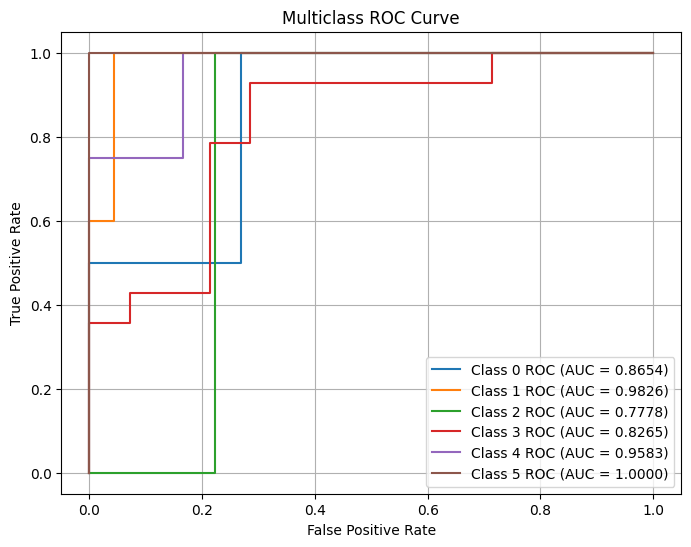

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict class probabilities for the validation set
y_pred_prob = disease_model.predict(X_val_dash)

# Number of classes
n_classes = num_classes

# Binarize the y_val labels if not already (sometimes needed)
# y_val_dash is already one-hot encoded in your case, so no need to binarize.

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_dash[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average AUC (average across all classes)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (AUC = {roc_auc[i]:.4f})')

plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [23]:
import joblib
import tensorflow as tf
import os

os.makedirs("saved_models", exist_ok=True)
binary_model_path = "/content/saved_models/binary_model.keras"
disease_model_path = "/content/saved_models/disease_model.keras"
label_encoder_path = "/content/saved_models/label_encoder.pkl"

model.save(binary_model_path)
disease_model.save(disease_model_path)

joblib.dump(label_encoder, label_encoder_path)

print("Saved binary model ->", binary_model_path)
print("Saved disease model ->", disease_model_path)
print("Saved label encoder ->", label_encoder_path)


Saved binary model -> /content/saved_models/binary_model.keras
Saved disease model -> /content/saved_models/disease_model.keras
Saved label encoder -> /content/saved_models/label_encoder.pkl


##Inference

In [31]:
import numpy as np
import joblib
import tensorflow as tf

binary_model_path = "/content/saved_models/binary_model.keras"
disease_model_path = "/content/saved_models/disease_model.keras"
label_encoder_path = "/content/saved_models/label_encoder.pkl"

binary_model = tf.keras.models.load_model(binary_model_path)
disease_model = tf.keras.models.load_model(disease_model_path)
label_encoder = joblib.load(label_encoder_path)

def predict_health_and_disease(X_input, binary_model=binary_model, disease_model=disease_model, label_encoder=label_encoder,
                                     healthy_threshold=0.5):
    """
    Two-stage inference:
      1) binary_model -> decide healthy vs not
      2) if not healthy -> disease_model -> predict disease (human-readable name)

    Returns a list of dicts (one per sample) with keys:
      - 'is_healthy' (bool)
      - 'healthy_prob' (float)  # probability of being healthy
      - 'disease_pred' (str or None)
      - 'disease_probs' (dict[str->float] or None)
    """
    # Convert input to numpy array and ensure correct shape
    X = np.asarray(X_input)
    if X.ndim == 1:
        X = X.reshape(1, -1)
    # Expand dims to match model input shape (n_features, 1)
    X_for_model = np.expand_dims(X, axis=-1)

    bin_probs = binary_model.predict(X_for_model).ravel()

    multi_probs = disease_model.predict(X_for_model)

    class_names = list(label_encoder.classes_)  # ensure list of class names (strings or numbers)
    results = []

    for i in range(X_for_model.shape[0]):
        not_healthy_prob = float(bin_probs[i])
        healthy_prob = 1.0 - not_healthy_prob
        is_healthy = healthy_prob >= healthy_threshold

        if is_healthy:
            results.append({
                "is_healthy": True,
                "healthy_prob": healthy_prob,
                "disease_pred": None,
                "disease_probs": None
            })
        else:
            probs = multi_probs[i]
            pred_idx = int(np.argmax(probs))
            try:
                pred_label = str(label_encoder.inverse_transform([pred_idx])[0])
            except Exception:
                pred_label = str(class_names[pred_idx])

            # Build human-readable prob dict mapping class_name -> probability
            disease_prob_dict = {str(class_names[j]): float(probs[j]) for j in range(len(class_names))}

            results.append({
                "is_healthy": False,
                "healthy_prob": healthy_prob,
                "disease_pred": pred_label,
                "disease_probs": disease_prob_dict
            })
    return results


In [32]:
# Example single sample (1D array of length n_features)
sample = X_val_dash[0].squeeze()  # if you already have X_val_dash loaded; .squeeze() to get (n_features,)

out = predict_health_and_disease(sample)
print(out)

# Example batch
batch = X_val_dash[:8].squeeze()  # shape (8, n_features)
outs = predict_health_and_disease(batch)
for o in outs:
    print(o)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[{'is_healthy': True, 'healthy_prob': 0.5134390890598297, 'disease_pred': None, 'disease_probs': None}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
{'is_healthy': True, 'healthy_prob': 0.5134391188621521, 'disease_pred': None, 'disease_probs': None}
{'is_healthy': True, 'healthy_prob': 0.9984876652015373, 'disease_pred': None, 'disease_probs': None}
{'is_healthy': False, 'healthy_prob': 0.17217415571212769, 'disease_pred': '3.0', 'disease_probs': {'0.0': 7.798962178640068e-05, '1.0': 4.324690598878078e-05, '2.0': 1.2460030340832873e-08, '3.0': 0.9998674392700195, '4.0': 1.1445233212725725e-05, '5.0': 1.7386139403163803e-11}}
{'is_healthy': True, 'healthy_prob': 0.9572811983525753, 'disease_pred': None, 'disease_probs': None}
{'is_healthy': True, 'healthy_prob': 0.7216509878635406, 'disease_pred': None, 'disease_probs': None}
{'is_healthy': True, 'healthy_prob': 0.972900593653